# Portfolio Optimization

## Monte Carlo Simulation for Optimization Search

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import quandl
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
start = pd.to_datetime('2013-01-01')
end = pd.to_datetime('2018-01-01')

In [3]:
# Grabbing the 7 tech stocks for our portfolio
aapl = quandl.get('WIKI/AAPL.11',start_date=start,end_date=end)
cisco = quandl.get('WIKI/CSCO.11',start_date=start,end_date=end)
ibm = quandl.get('WIKI/IBM.11',start_date=start,end_date=end)
amzn = quandl.get('WIKI/AMZN.11',start_date=start,end_date=end)
adobe = quandl.get('WIKI/ADBE.11',start_date=start,end_date=end)
msft = quandl.get('WIKI/MSFT.11',start_date=start,end_date=end)
oracle = quandl.get('WIKI/ORCL.11',start_date=start,end_date=end)

In [4]:
stocks = pd.concat([aapl,cisco,ibm,amzn,adobe,msft,oracle],axis=1)
stocks.columns = ['aapl','cisco','ibm','amzn','adobe','msft','oracle']

In [5]:
stocks.head()

,aapl,cisco,ibm,amzn,adobe,msft,oracle
Date,,,,,,,
2013-01-02,71.195748,17.452010,168.890592,257.3100,38.34,24.194478,32.511770
2013-01-03,70.296565,17.546392,167.961630,258.4800,37.75,23.870367,32.155631
2013-01-04,68.338996,17.573762,166.860637,259.1500,38.13,23.423618,32.436794
2013-01-07,67.937002,17.409367,166.129509,268.4592,37.94,23.379820,32.268096
2013-01-08,68.119845,17.426270,165.897268,266.3800,38.14,23.257183,32.277468


In [6]:
mean_daily_ret = stocks.pct_change(1).mean()
mean_daily_ret

aapl      0.000803
cisco     0.000711
ibm      -0.000008
amzn      0.001372
adobe     0.001325
msft      0.001104
oracle    0.000380
dtype: float64

In [7]:
corrmap = stocks.pct_change(1).corr()

<AxesSubplot:>

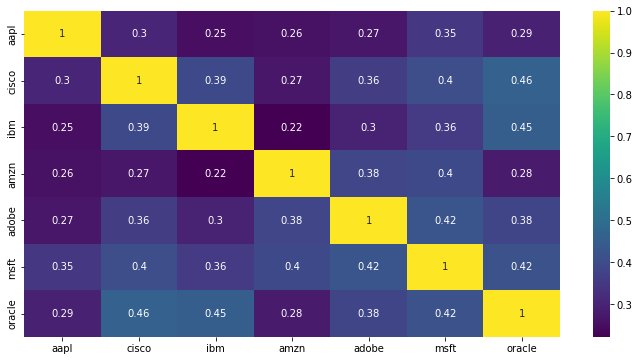

In [8]:
plt.figure(figsize=(12,6))
sns.heatmap(corrmap,annot=True,cmap='viridis')

# Simulating Thousands of Possible Allocations

In [9]:
stocks.head()

,aapl,cisco,ibm,amzn,adobe,msft,oracle
Date,,,,,,,
2013-01-02,71.195748,17.452010,168.890592,257.3100,38.34,24.194478,32.511770
2013-01-03,70.296565,17.546392,167.961630,258.4800,37.75,23.870367,32.155631
2013-01-04,68.338996,17.573762,166.860637,259.1500,38.13,23.423618,32.436794
2013-01-07,67.937002,17.409367,166.129509,268.4592,37.94,23.379820,32.268096
2013-01-08,68.119845,17.426270,165.897268,266.3800,38.14,23.257183,32.277468


<AxesSubplot:xlabel='Date'>

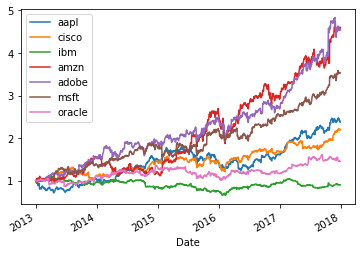

In [10]:
stock_normed = stocks/stocks.iloc[0]
stock_normed.plot()

In [11]:
stock_daily_ret = stocks.pct_change(1)
stock_daily_ret.head()

,aapl,cisco,ibm,amzn,adobe,msft,oracle
Date,,,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.012630,0.005408,-0.005500,0.004547,-0.015389,-0.013396,-0.010954
2013-01-04,-0.027847,0.001560,-0.006555,0.002592,0.010066,-0.018716,0.008744
2013-01-07,-0.005882,-0.009355,-0.004382,0.035922,-0.004983,-0.001870,-0.005201
2013-01-08,0.002691,0.000971,-0.001398,-0.007745,0.005271,-0.005245,0.000290


## Log Returns vs Arithmetic Returns


In [12]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,aapl,cisco,ibm,amzn,adobe,msft,oracle
Date,,,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.012710,0.005393,-0.005516,0.004537,-0.015508,-0.013487,-0.011015
2013-01-04,-0.028242,0.001559,-0.006577,0.002589,0.010016,-0.018893,0.008706
2013-01-07,-0.005900,-0.009399,-0.004391,0.035292,-0.004995,-0.001872,-0.005214
2013-01-08,0.002688,0.000970,-0.001399,-0.007775,0.005258,-0.005259,0.000290


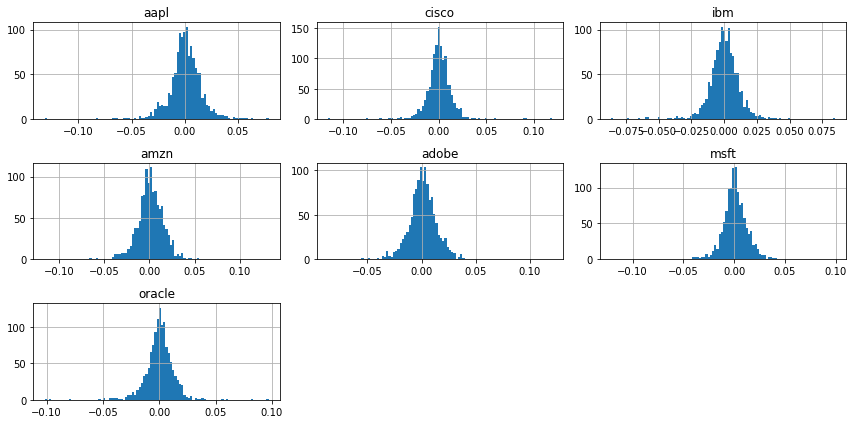

In [13]:
log_ret.hist(bins=100,figsize=(12,6));
plt.tight_layout()

In [14]:
log_ret.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
aapl,1255.0,0.000671,0.015087,-0.131875,-0.006310,0.000492,0.008680,0.078794
cisco,1257.0,0.000625,0.013052,-0.116091,-0.005354,0.000438,0.007143,0.118862
ibm,1257.0,-0.000076,0.011744,-0.086419,-0.005793,0.000063,0.006193,0.084934
amzn,1255.0,0.001205,0.018231,-0.116503,-0.007419,0.000923,0.010513,0.132178
adobe,1255.0,0.001210,0.015135,-0.086548,-0.006181,0.001083,0.008674,0.120270
msft,1257.0,0.001005,0.014081,-0.121033,-0.005789,0.000502,0.007734,0.099413
oracle,1257.0,0.000298,0.012859,-0.101903,-0.005359,0.000494,0.006770,0.096943


In [15]:
log_ret.mean() * 252

aapl      0.169172
cisco     0.157574
ibm      -0.019260
amzn      0.303552
adobe     0.305008
msft      0.253175
oracle    0.075076
dtype: float64

In [16]:
log_ret.cov()

,aapl,cisco,ibm,amzn,adobe,msft,oracle
aapl,0.000228,0.000059,0.000044,0.000071,0.000062,0.000073,0.000057
cisco,0.000059,0.000170,0.000060,0.000065,0.000072,0.000075,0.000078
ibm,0.000044,0.000060,0.000138,0.000048,0.000053,0.000059,0.000068
amzn,0.000071,0.000065,0.000048,0.000332,0.000108,0.000100,0.000066
adobe,0.000062,0.000072,0.000053,0.000108,0.000229,0.000092,0.000075
msft,0.000073,0.000075,0.000059,0.000100,0.000092,0.000198,0.000076
oracle,0.000057,0.000078,0.000068,0.000066,0.000075,0.000076,0.000165


In [17]:
log_ret.cov()*252 

,aapl,cisco,ibm,amzn,adobe,msft,oracle
aapl,0.057359,0.014970,0.011142,0.017847,0.015628,0.018493,0.014370
cisco,0.014970,0.042926,0.015185,0.016335,0.018148,0.018818,0.019582
ibm,0.011142,0.015185,0.034755,0.012056,0.013327,0.014854,0.017037
amzn,0.017847,0.016335,0.012056,0.083755,0.027223,0.025138,0.016618
adobe,0.015628,0.018148,0.013327,0.027223,0.057724,0.023115,0.018846
msft,0.018493,0.018818,0.014854,0.025138,0.023115,0.049963,0.019065
oracle,0.014370,0.019582,0.017037,0.016618,0.018846,0.019065,0.041667


## Single Run for Some Random Allocation

In [18]:
np.random.seed(101)

# Stock Columns
print('Stocks')
print(stocks.columns)
print('\n')

# Create Random Weights
print('Creating Random Weights')
weights = np.array(np.random.random(7))
print(weights)
print('\n')

# Rebalance Weights
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weights) *252
print(exp_ret)
print('\n')

# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)


Stocks
Index(['aapl', 'cisco', 'ibm', 'amzn', 'adobe', 'msft', 'oracle'], dtype='object')


Creating Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166 0.68527698 0.83389686
 0.30696622]


Rebalance to sum to 1.0
[0.16587379 0.18330566 0.00914628 0.05509493 0.22011965 0.26785824
 0.09860144]


Expected Portfolio Return
0.21584919469045605


Expected Volatility
0.15903961929149696


Sharpe Ratio
1.3572039197027705


In [19]:
num_ports = 15000

all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(7))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [20]:
sharpe_arr.max()

1.47763419384882

In [21]:
sharpe_arr.argmax()

11134

In [22]:
all_weights[11134,:]

array([0.07294924, 0.12026819, 0.00795709, 0.27596804, 0.28934021,
       0.23137751, 0.00213972])

In [25]:
max_sr_ret = ret_arr[11134]
max_sr_vol = vol_arr[11134]
max_sr_ret

0.2619001504426451

## Plotting the data

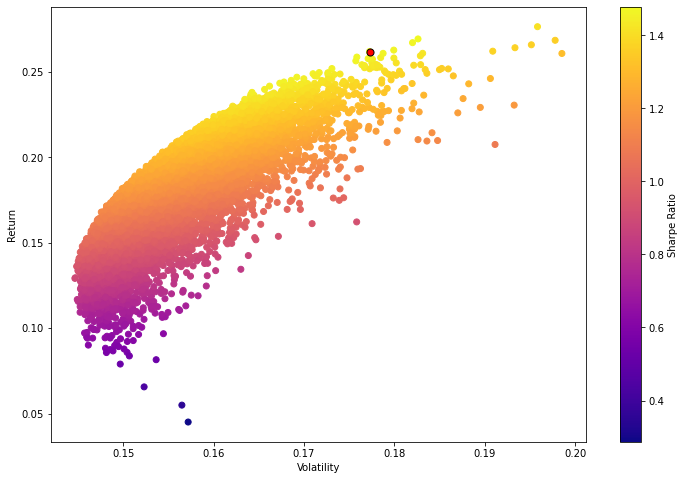

In [29]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Adding red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

# Mathematical Optimization


### Functionalize Return and SR operations

In [30]:
def get_ret_vol_sr(weights):
    """
    Takes in weights, returns array or return,volatility, sharpe ratio
    """
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [31]:
from scipy.optimize import minimize

In [29]:
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where ``x`` is an 1-D array with shape (n,) and ``args``
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where 'n' is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see her

Optimization works as a minimization function, since we actually want to maximize the Sharpe Ratio, we will need to turn it negative so we can minimize the negative sharpe (same as maximizing the postive sharpe)

In [32]:
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1

In [33]:
def check_sum(weights):
    '''
    Returns 0 if sum of weights is 1.0
    '''
    return np.sum(weights) - 1

In [34]:
cons = ({'type':'eq','fun': check_sum})

In [35]:
# 0-1 bounds for each weight
bounds = ((0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

In [36]:
# Initial Guess (equal distribution)
init_guess = [0.25,0.25,0.25,0.25,0.25,0.25,0.25]

In [37]:
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [38]:
opt_results

     fun: -1.504274109349764
     jac: array([-2.94804573e-04, -2.51501799e-04,  7.24727198e-01, -4.28706408e-05,
       -6.71744347e-05,  2.56583095e-04,  4.20107692e-01])
 message: 'Optimization terminated successfully'
    nfev: 56
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([8.33560468e-02, 4.86491982e-02, 0.00000000e+00, 1.96796260e-01,
       3.92135923e-01, 2.79062572e-01, 1.40024711e-16])

In [39]:
opt_results.x

array([8.33560468e-02, 4.86491982e-02, 0.00000000e+00, 1.96796260e-01,
       3.92135923e-01, 2.79062572e-01, 1.40024711e-16])

In [40]:
get_ret_vol_sr(opt_results.x)

array([0.27176135, 0.18065946, 1.50427411])

# All Optimal Portfolios (Efficient Frontier)

In [41]:
# Our returns go from 0 to somewhere along 0.3
frontier_y = np.linspace(0,0.3,100)

In [42]:
def minimize_volatility(weights):
    return  get_ret_vol_sr(weights)[1] 

In [43]:
frontier_volatility = []

for possible_return in frontier_y:
    
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])

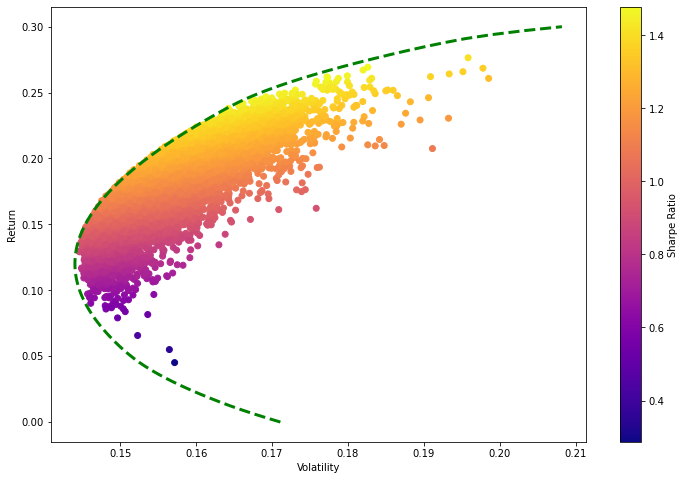

In [44]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')


plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)

# Capital Asset Pricing Model

In [76]:
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
start = pd.to_datetime('2013-01-01')
end = pd.to_datetime('2018-01-01')

In [78]:
import pandas_datareader as web

In [79]:
spy_etf = web.DataReader('SPY','yahoo',start,end)
aapl = web.DataReader('AAPL','yahoo',start,end)
cisco = web.DataReader('CSCO','yahoo',start,end)
ibm = web.DataReader('IBM','yahoo',start,end)
amzn = web.DataReader('AMZN','yahoo',start,end)
adobe = web.DataReader('ADBE','yahoo',start,end)
msft = web.DataReader('MSFT','yahoo',start,end)
oracle = web.DataReader('ORCL','yahoo',start,end)

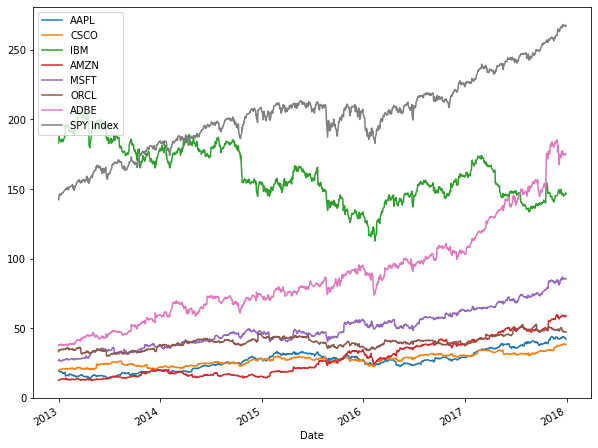

In [80]:
aapl['Close'].plot(label='AAPL',figsize=(10,8))
cisco['Close'].plot(label='CSCO',figsize=(10,8))
ibm['Close'].plot(label='IBM',figsize=(10,8))
amzn['Close'].plot(label='AMZN',figsize=(10,8))
msft['Close'].plot(label='MSFT',figsize=(10,8))
oracle['Close'].plot(label='ORCL',figsize=(10,8))
adobe['Close'].plot(label='ADBE',figsize=(10,8))
spy_etf['Close'].plot(label='SPY Index')
plt.legend()

# Comparing Cumulative Returns

In [81]:
aapl['Cumulative'] = aapl['Close']/aapl['Close'].iloc[0]
cisco['Cumulative'] = cisco['Close']/cisco['Close'].iloc[0]
ibm['Cumulative'] = ibm['Close']/ibm['Close'].iloc[0]
msft['Cumulative'] = msft['Close']/msft['Close'].iloc[0]
adobe['Cumulative'] = adobe['Close']/adobe['Close'].iloc[0]
oracle['Cumulative'] = oracle['Close']/oracle['Close'].iloc[0]
amzn['Cumulative'] = amzn['Close']/amzn['Close'].iloc[0]

spy_etf['Cumulative'] = spy_etf['Close']/spy_etf['Close'].iloc[0]

Text(0.5, 1.0, 'Cumulative Return')

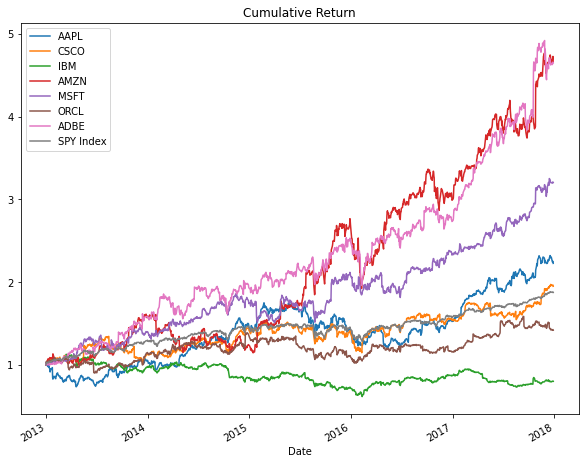

In [82]:
aapl['Cumulative'].plot(label='AAPL',figsize=(10,8))
cisco['Cumulative'].plot(label='CSCO',figsize=(10,8))
ibm['Cumulative'].plot(label='IBM',figsize=(10,8))
amzn['Cumulative'].plot(label='AMZN',figsize=(10,8))
msft['Cumulative'].plot(label='MSFT',figsize=(10,8))
oracle['Cumulative'].plot(label='ORCL',figsize=(10,8))
adobe['Cumulative'].plot(label='ADBE',figsize=(10,8))


spy_etf['Cumulative'].plot(label='SPY Index')
plt.legend()
plt.title('Cumulative Return')

# Daily Returns

In [83]:
aapl['Daily Return'] = aapl['Close'].pct_change(1)
cisco['Daily Return'] = cisco['Close'].pct_change(1)
amzn['Daily Return'] = amzn['Close'].pct_change(1)
msft['Daily Return'] = msft['Close'].pct_change(1)
adobe['Daily Return'] = adobe['Close'].pct_change(1)
oracle['Daily Return'] = oracle['Close'].pct_change(1)
ibm['Daily Return'] = ibm['Close'].pct_change(1)

spy_etf['Daily Return'] = spy_etf['Close'].pct_change(1)

In [84]:
dailyreturns = pd.concat([aapl['Daily Return'],cisco['Daily Return'],amzn['Daily Return'],msft['Daily Return'],
                         adobe['Daily Return'],oracle['Daily Return'],ibm['Daily Return'],spy_etf['Daily Return']],axis=1)
dailyreturns.columns = ['AAPL Returns','CSCO Returns','AMZN Returns','MSFT Returns','ADBE Returns','ORCL Returns',
                       'IBM Returns','SPY Returns']

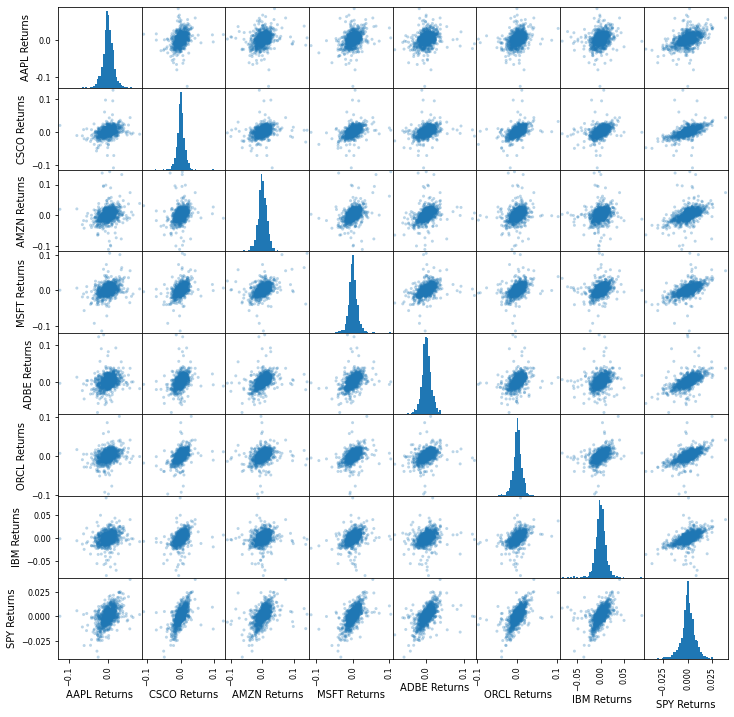

In [85]:
from pandas.plotting import scatter_matrix
scatter_matrix(dailyreturns,figsize=(12,12),alpha=0.3,hist_kwds={'bins':50});

<AxesSubplot:>

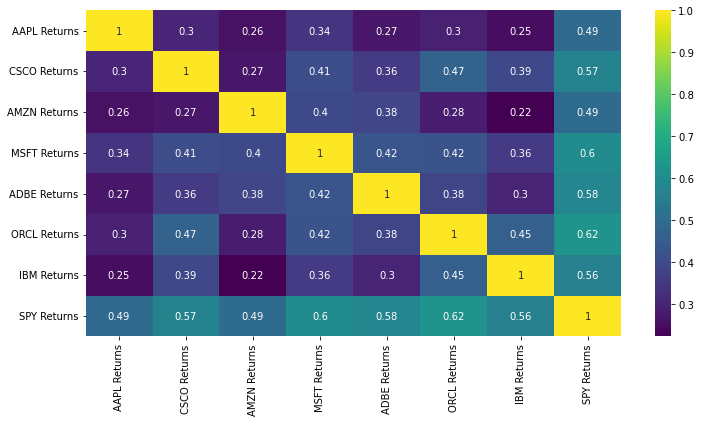

In [86]:
corrmap = dailyreturns.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corrmap,annot=True,cmap='viridis')

In [87]:
beta1,alpha1,r_value1,p_value1,std_err1 = stats.linregress(aapl['Daily Return'].iloc[1:],spy_etf['Daily Return'].iloc[1:])
beta2,alpha2,r_value2,p_value2,std_err2 = stats.linregress(amzn['Daily Return'].iloc[1:],spy_etf['Daily Return'].iloc[1:])
beta3,alpha3,r_value3,p_value3,std_err3 = stats.linregress(ibm['Daily Return'].iloc[1:],spy_etf['Daily Return'].iloc[1:])
beta4,alpha4,r_value4,p_value4,std_err4 = stats.linregress(oracle['Daily Return'].iloc[1:],spy_etf['Daily Return'].iloc[1:])
beta5,alpha5,r_value5,p_value5,std_err5 = stats.linregress(adobe['Daily Return'].iloc[1:],spy_etf['Daily Return'].iloc[1:])
beta6,alpha6,r_value6,p_value6,std_err6 = stats.linregress(msft['Daily Return'].iloc[1:],spy_etf['Daily Return'].iloc[1:])
beta7,alpha7,r_value7,p_value7,std_err7 = stats.linregress(cisco['Daily Return'].iloc[1:],spy_etf['Daily Return'].iloc[1:])

In [88]:
vals = [beta1,beta2,beta3,beta4,beta5,beta6,beta7]
maxbeta = max(vals)
maxindex = vals.index(maxbeta)
print(maxbeta,maxindex)

0.36189739341842947 3


In [91]:
alpha4

0.00039643530848644705

In [92]:
r_value4

0.621031377872485